data : https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store?select=2019-Nov.csv

In [1]:
import pandas as pd
from IPython.display import display
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import mannwhitneyu
import gc

# del df
gc.collect()

df = pd.read_csv("c:\\data\\e-commerce\\2019-Oct.csv", usecols=['event_time', 'event_type', 'product_id', 'brand', 'category_code', 'price', 'user_id', 'user_session'])
df.head(2)

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc


In [2]:
# print(df['user_id'].nunique())

In [3]:
# df[df['user_id'] == 541312140].head(2)

In [4]:
# def find_longest_session(df, user_id):
#     df = df[df['user_id'] == user_id]
#     most_frequent_session = df['user_session'].mode()[0]
#     longest = df[df['user_session'] == most_frequent_session]
#     return longest

In [5]:
# longest = find_longest_session(df, 541312140)
# display(longest)

In [6]:
# longest = find_longest_session(df, 554748717)
# display(longest)

In [7]:
# behavior_count = df.groupby('user_id')['user_session'].nunique().sort_values(ascending=True)
# behavior_count

In [8]:
# longest = find_longest_session(df, behavior_count.idxmax())
# longest

In [9]:
# count = (behavior_count == 1).sum()
# print(count)

In [10]:
# list1 = behavior_count[behavior_count == 1].index.tolist()
# list1[:3]

In [11]:
# longest = find_longest_session(df, list1[1])
# longest

In [12]:
# purchase = df[df['event_type'] == 'purchase']
# purchase.head(2)

In [13]:
# cart = df[df['event_type'] == 'cart']
# cart.head(2)

In [14]:
# def get_weekday(df):
#     df['event_time'] = pd.to_datetime(df['event_time'])
#     df['weekday'] = df['event_time'].dt.strftime('%A')
#     return df['weekday']

# df['weekday'] = get_weekday(df)
# df

In [15]:
# view_count_by_weekday = df[df['event_type'] == 'view']['weekday'].value_counts()
# view_count_by_weekday

In [16]:
# weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
# view_count_by_weekday = view_count_by_weekday.reindex(weekday_order)
# view_count_by_weekday

In [17]:
# plt.figure(figsize=(10, 6))

# view_count_by_weekday.plot(kind='bar', color='skyblue')
# plt.title('view count by weekday')
# plt.xlabel('weekday')
# plt.ylabel('view count')
# plt.show()

In [18]:
# purchase_count_by_weekday = df[df['event_type'] == 'purchase']['weekday'].value_counts()
# purchase_count_by_weekday

In [19]:
# weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# purchase_count_by_weekday = purchase_count_by_weekday.reindex(weekday_order)
# purchase_count_by_weekday

In [20]:
# plt.figure(figsize=(10, 6))

# purchase_count_by_weekday.plot(kind='bar', color='skyblue')
# plt.title('purchase count by weekday')
# plt.xlabel('weekday')
# plt.ylabel('purchase count')
# plt.show()

In [21]:
# event_type_count = df['event_type'].value_counts()

# event_type_count.plot(kind='bar', color='skyblue')
# plt.xlabel('Event type')
# plt.ylabel('Count')
# plt.title('Event Type Counts')
# plt.show()

In [22]:
# event_type_count.drop('view', inplace=True)
# event_type_count

In [23]:
# event_type_count.plot(kind='bar', color='skyblue')
# plt.xlabel('Event type')
# plt.ylabel('Count')
# plt.title('Event Type Counts')
# plt.show()

In [24]:
# df.head(2)

In [25]:
df['category_code'] = df['category_code'].astype('category')
df['category_code'] = df['category_code'].cat.add_categories('unknown.')
df['category_code'].fillna('unknown.', inplace=True)

df['general_category'] = df['category_code'].apply(lambda x: x.split('.')[0])
display(df.head(2))

C:\Users\User\AppData\Local\Temp\ipykernel_3116\3709310507.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['category_code'].fillna('unknown.', inplace=True)


,event_time,event_type,product_id,category_code,brand,price,user_id,user_session,general_category
0,2019-10-01 00:00:00 UTC,view,44600062,unknown.,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,unknown
1,2019-10-01 00:00:00 UTC,view,3900821,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,appliances


In [26]:
# category_purchase = df[df['event_type'] == 'purchase'].groupby('general_category')['event_type'].count().sort_values(ascending=False)

# top_categories = category_purchase.head(10)

# plt.figure(figsize=(12, 6))
# top_categories.plot(kind='bar', color='skyblue')
# plt.title('Top 10 Categories')
# plt.xlabel('Category')
# plt.ylabel('Purchase Count')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


In [27]:
# pd.set_option('display.float_format', '{:.2f}'.format)
# display(df['price'].describe())
# pd.reset_option('display.float_format')

In [28]:
# df['price'].max()

In [29]:
# cart_data = df[df['event_type'] == 'cart']

# bins = [0, 10, 50, 100, 200, 500, 1000, 2000, cart_data['price'].max()]
# labels = ['0-10', '10-50', '50-100', '100-200', '200-500', '500-1000', '1000-2000', '2000~']
# cart_data['price_range'] = pd.cut(cart_data['price'], bins=bins, labels=labels, include_lowest=True)

# price_range_counts = cart_data['price_range'].value_counts().sort_index()

# plt.figure(figsize=(12, 6))
# price_range_counts.plot(kind='bar', color='skyblue')
# plt.title('Cart Count by Price Range')
# plt.xlabel('Price Range')
# plt.ylabel('Purchase Count')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [30]:
# purchase_data = df[df['event_type'] == 'purchase']

# bins = [0, 10, 50, 100, 200, 500, 1000, 2000, purchase_data['price'].max()]
# labels = ['0-10', '10-50', '50-100', '100-200', '200-500', '500-1000', '1000-2000', '2000~']
# purchase_data['price_range'] = pd.cut(purchase_data['price'], bins=bins, labels=labels, include_lowest=True)

# price_range_counts = purchase_data['price_range'].value_counts().sort_index()

# plt.figure(figsize=(12, 6))
# price_range_counts.plot(kind='bar', color='skyblue')
# plt.title('Purchase Count by Price Range')
# plt.xlabel('Price Range')
# plt.ylabel('Purchase Count')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


In [31]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# display(df[(df['user_id'] == 543272936) & (df['event_type'] == 'purchase')])
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

In [32]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans

# df['event_time'] = pd.to_datetime(df['event_time'])

# latest_date = df['event_time'].max()
# rfm = df[df['event_type'] == 'purchase'].groupby('user_id').agg({
#     'event_time': lambda x: (latest_date - x.max()).days,  # 최근 구매 일수
#     'user_session': 'count',                              # 구매 빈도
#     'price': 'sum'                                        # 구매 금액
# }).reset_index()

# rfm.columns = ['user_id', 'Recency', 'Frequency', 'Monetary']

# # NaN 값 처리
# rfm = rfm[rfm['Monetary'] > 0]


In [33]:
# scaler = StandardScaler()
# rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# kmeans = KMeans(n_clusters=4, random_state=42)
# rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# cluster_summary = rfm.groupby('Cluster').mean()
# display(cluster_summary)


In [34]:
# plt.figure(figsize=(10, 6))
# sns.scatterplot(
#     x='Recency', y='Frequency', hue='Cluster', data=rfm, palette='viridis', alpha=0.7
# )
# plt.title('User Segmentation by Recency and Frequency')
# plt.xlabel('Recency (Days)')
# plt.ylabel('Frequency (Purchases)')
# plt.legend(title='Cluster')
# plt.show()


In [35]:
# df_purchase = df[df['event_type'] == 'purchase'].merge(
#     rfm[['user_id', 'Cluster']], on='user_id', how='left'
# )

# category_cluster = df_purchase.groupby(['Cluster', 'general_category']).size().unstack(fill_value=0)
# category_cluster = category_cluster.div(category_cluster.sum(axis=1), axis=0)

# category_cluster.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
# plt.title('Purchase Categories by Cluster')
# plt.xlabel('Cluster')
# plt.ylabel('Proportion')
# plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()


In [36]:
# scaler = StandardScaler()
# rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
# kmeans8 = KMeans(n_clusters=8, random_state=42)
# rfm['Cluster'] = kmeans8.fit_predict(rfm_scaled)

# cluster_summary = rfm.groupby('Cluster').mean()
# display(cluster_summary)

In [37]:
# plt.figure(figsize=(10, 6))
# sns.scatterplot(
#     x='Recency', y='Frequency', hue='Cluster', data=rfm, palette='Set2', alpha=0.7
# )
# plt.title('User Segmentation by Recency and Frequency')
# plt.xlabel('Recency (Days)')
# plt.ylabel('Frequency (Purchases)')
# plt.legend(title='Cluster')
# plt.show()

In [38]:
# df_purchase = df[df['event_type'] == 'purchase'].merge(
#     rfm[['user_id', 'Cluster']], on='user_id', how='left'
# )

# category_cluster = df_purchase.groupby(['Cluster', 'general_category']).size().unstack(fill_value=0)
# category_cluster = category_cluster.div(category_cluster.sum(axis=1), axis=0)

# category_cluster.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
# plt.title('Purchase Categories by Cluster')
# plt.xlabel('Cluster')
# plt.ylabel('Proportion')
# plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

Most of products are high-involvement products.

In [39]:
df['user_session'] = df['user_session'].astype('category').cat.codes
df.head()

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session,general_category
0,2019-10-01 00:00:00 UTC,view,44600062,unknown.,shiseido,35.79,541312140,4147850,unknown
1,2019-10-01 00:00:00 UTC,view,3900821,appliances.environment.water_heater,aqua,33.20,554748717,5316338,appliances
2,2019-10-01 00:00:01 UTC,view,17200506,furniture.living_room.sofa,NaN,543.10,519107250,3120153,furniture
3,2019-10-01 00:00:01 UTC,view,1307067,computers.notebook,lenovo,251.74,550050854,4499321,computers
4,2019-10-01 00:00:04 UTC,view,1004237,electronics.smartphone,apple,1081.98,535871217,7176696,electronics


In [ ]:
view = df[df['event_type'] == 'view']
df = df[df['event_type'] != 'view']
view = view.drop_duplicates(subset=['user_id', 'product_id', 'user_session'])

df = pd.concat([df, view], ignore_index=True)
df.sort_values(by=['user_id', 'event_time'], inplace=True)

In [41]:
df.head(10)

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session,general_category
22612047,2019-10-23 20:04:08 UTC,view,7002639,kids.carriage,bumbleride,769.65,33869381,7808651,kids
12092748,2019-10-13 00:13:46 UTC,view,10600284,unknown.,NaN,0.00,64078358,3521414,unknown
3287498,2019-10-02 21:43:00 UTC,view,22200103,unknown.,NaN,15.77,183503497,4921057,unknown
4823664,2019-10-04 17:44:37 UTC,view,6902133,furniture.living_room.chair,joie,143.89,184265397,1603017,furniture
4829445,2019-10-04 17:50:50 UTC,view,6902303,furniture.living_room.chair,joie,111.46,184265397,1603017,furniture
14945521,2019-10-15 17:18:59 UTC,view,27400002,unknown.,oral-b,79.77,184265397,7109281,unknown
9329834,2019-10-10 03:35:36 UTC,view,4804056,electronics.audio.headphone,apple,161.88,195082191,6254204,electronics
9823583,2019-10-10 15:02:36 UTC,view,6701171,computers.components.videocards,sinotex,99.42,200673532,313543,computers
11410270,2019-10-12 07:58:37 UTC,view,6701171,computers.components.videocards,sinotex,99.42,200673532,2649426,computers
11759746,2019-10-12 14:47:07 UTC,view,6501011,computers.components.motherboard,asrock,73.36,200673532,4464910,computers


In [42]:
buy_sessions = df[df['event_type'] == 'purchase']['user_session'].unique()

buy_log = df[df['user_session'].isin(buy_sessions)]
view_log = df[~df['user_session'].isin(buy_sessions)]


In [43]:
buy_log.tail(10)

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session,general_category
29450285,2019-10-31 23:20:43 UTC,view,12704161,unknown.,pirelli,131.28,566272569,571331,unknown
1669247,2019-10-31 23:21:29 UTC,cart,12704161,unknown.,pirelli,131.28,566272569,571331,unknown
1669253,2019-10-31 23:24:12 UTC,purchase,12704161,unknown.,pirelli,131.28,566272569,571331,unknown
29448955,2019-10-31 23:03:26 UTC,view,1005136,electronics.smartphone,apple,2011.63,566274637,590198,electronics
1669214,2019-10-31 23:05:38 UTC,purchase,1005136,electronics.smartphone,apple,2011.63,566274637,590198,electronics
29450651,2019-10-31 23:25:17 UTC,view,12702883,unknown.,cordiant,74.39,566276996,6020056,unknown
1669289,2019-10-31 23:34:56 UTC,purchase,12702883,unknown.,cordiant,74.39,566276996,6020056,unknown
29451600,2019-10-31 23:38:14 UTC,view,1005144,electronics.smartphone,apple,1661.09,566278294,4935773,electronics
1669301,2019-10-31 23:39:32 UTC,cart,1005144,electronics.smartphone,apple,1661.09,566278294,4935773,electronics
1669311,2019-10-31 23:42:46 UTC,purchase,1005144,electronics.smartphone,apple,1661.09,566278294,4935773,electronics


In [44]:
display(len(buy_log[buy_log['event_type'] == 'purchase']))
display(len(buy_log[buy_log['event_type'] == 'cart']))

742849

498580

view -> purchase 
  
is possible

In [45]:
session_seq = buy_log.groupby(['user_id', 'user_session'])['event_type'].apply(list)

In [46]:
display(session_seq)

user_id    user_session
264649825  6397854                              [view, view, purchase, view]
           6398112                                    [view, purchase, view]
303160429  4960213                                          [view, purchase]
340041246  3229983         [view, view, view, view, view, view, view, vie...
           5895452            [view, view, view, view, view, view, purchase]
                                                 ...                        
566272569  571331                                     [view, cart, purchase]
           6761547                  [view, view, view, view, view, purchase]
566274637  590198                                           [view, purchase]
566276996  6020056                                          [view, purchase]
566278294  4935773                                    [view, cart, purchase]
Name: event_type, Length: 629562, dtype: object

In [47]:
def has_cart_before_purchase(events):
    if "purchase" not in events:
        return None
    purchase_idx = events.index("purchase")
    return "cart" in events[:purchase_idx]

# session_level
session_cart_before_purchase = session_seq.apply(has_cart_before_purchase)

# user_level
user_cart_before_purchase = session_cart_before_purchase.groupby("user_id").any()


In [48]:
display(session_cart_before_purchase.value_counts())
display(user_cart_before_purchase.value_counts())

event_type
False    348910
True     280650
Name: count, dtype: int64

event_type
True     177950
False    169170
Name: count, dtype: int64

### cart→purchase vs view→purchase 고객을 나누기 
  
구매 전 view 횟수 비교  
- H1: cart->purchase 고객이 view->purchase 고객보다 본 상품수가 많을 것이다.
  
구매 시간 비교  
- H2: cart->purchase 고객은 구매까지의 시간이 더 짧을 것이다.  
  
상품 평균 가격 비교  
- H3: cart->purchase 고객은 view->purchase 고객보다 더 비싼 제품을 살 것이다.  

In [49]:
cart_users = user_cart_before_purchase[user_cart_before_purchase==True].index
view_users = user_cart_before_purchase[user_cart_before_purchase==False].index

cart_purchase_log = buy_log[buy_log['user_id'].isin(cart_users)]
view_purchase_log = buy_log[buy_log['user_id'].isin(view_users)]

In [50]:
def count_view_before_purchase(events):
    if "purchase" not in events:
        return 0
    purchase_idx = events.index("purchase")
    return events[:purchase_idx].count("view")

In [51]:
# cart -> purchase
cart_session_seq = cart_purchase_log.groupby(["user_id", "user_session"])["event_type"].apply(list)
cart_pre_views = cart_session_seq.apply(count_view_before_purchase)

# view -> purchase
view_session_seq = view_purchase_log.groupby(["user_id", "user_session"])["event_type"].apply(list)
view_pre_views = view_session_seq.apply(count_view_before_purchase)

In [52]:
display(f"Cart→Purchase 평균 상품 수: {cart_pre_views.mean():.3f}")
display(f"View→Purchase 평균 상품 수: {view_pre_views.mean():.3f}")

'Cart→Purchase 평균 상품 수: 2.197'

'View→Purchase 평균 상품 수: 2.744'

In [53]:
stat, p_value = mannwhitneyu(cart_pre_views, view_pre_views, alternative='two-sided')
display(f"statistic: {stat:.3f}")
display(f"p-value: {p_value:.3f}")

'statistic: 42196376112.500'

'p-value: 0.000'

### H1 기각

In [54]:
def get_time_from_session_start(df):
    df = df.sort_values('event_time')
    if 'purchase' not in df['event_type'].values:
        return pd.NaT
    start_time = pd.to_datetime(df['event_time'].iloc[0])
    purchase_time = pd.to_datetime(df.loc[df['event_type'] == 'purchase', 'event_time'].iloc[0])
    return purchase_time - start_time

In [55]:
cart_session_time = cart_purchase_log.groupby(['user_id', 'user_session']).apply(get_time_from_session_start).dropna()
view_session_time = view_purchase_log.groupby(['user_id', 'user_session']).apply(get_time_from_session_start).dropna()

C:\Users\User\AppData\Local\Temp\ipykernel_3116\1014949371.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cart_session_time = cart_purchase_log.groupby(['user_id', 'user_session']).apply(get_time_from_session_start).dropna()
C:\Users\User\AppData\Local\Temp\ipykernel_3116\1014949371.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  view_session_time = view_purchase_log.groupby(['user_id', 'user_sessi

In [56]:
display(f"Cart→Purchase 평균 시간: {cart_session_time.mean()}")
display(f"View→Purchase 평균 시간: {view_session_time.mean()}")

'Cart→Purchase 평균 시간: 0 days 00:06:08.708010661'

'View→Purchase 평균 시간: 0 days 00:08:23.025918605'

In [57]:
stat, p_value = mannwhitneyu(cart_session_time.dt.total_seconds(), view_session_time.dt.total_seconds(), alternative='two-sided')
display(f"statistic: {stat:.3f}")
display(f"p-value: {p_value:.3f}")

'statistic: 37433566030.500'

'p-value: 0.000'

In [58]:
def get_time_to_purchase(df, from_event):
    df = df.sort_values('event_time').reset_index(drop=True)
    if 'purchase' not in df['event_type'].values or from_event not in df['event_type'].values:
        return pd.NaT 
    from_idx = df[df['event_type'] == from_event].index[0]
    purchase_idx = df[df['event_type'] == 'purchase'].index[0]
    if purchase_idx <= from_idx: return pd.NaT
    times = pd.to_datetime(df['event_time'])
    return times[purchase_idx] - times[from_idx]

In [59]:
cart_purchase_time = cart_purchase_log.groupby(['user_id', 'user_session']).apply(lambda df: get_time_to_purchase(df, 'cart'))
cart_purchase_time = cart_purchase_time.dropna()
view_purchase_time = view_purchase_log.groupby(['user_id', 'user_session']).apply(lambda df: get_time_to_purchase(df, 'view'))
view_purchase_time = view_purchase_time.dropna()

C:\Users\User\AppData\Local\Temp\ipykernel_3116\2027274666.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  times = pd.to_datetime(df['event_time'])
C:\Users\User\AppData\Local\Temp\ipykernel_3116\2027274666.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  times = pd.to_datetime(df['event_time'])
C:\Users\User\AppData\Local\Temp\ipykernel_3116\2027274666.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  times = pd.to_datetime(df['event_time'])
C:\Users\User\AppData\Local\Temp\ipykernel_3116\2027274666.py:8: UserWarning: Could not infer format, so each element will b

In [60]:
display(f"Cart→Purchase 평균 시간: {cart_purchase_time.mean()}") 
display(f"View→Purchase 평균 시간: {view_purchase_time.mean()}")

'Cart→Purchase 평균 시간: 0 days 00:03:09.374331017'

'View→Purchase 평균 시간: 0 days 00:08:24.250570872'

In [61]:
stat, p_value = mannwhitneyu(cart_purchase_time.dt.total_seconds(), view_purchase_time.dt.total_seconds(), alternative='two-sided')
display(f"statistic: {stat:.3f}")
display(f"p-value: {p_value:.3f}")

'statistic: 17906672617.500'

'p-value: 0.000'

### H2 지지

In [62]:
cart_purchase_only = cart_purchase_log[cart_purchase_log['event_type'] == 'purchase']
view_purchase_only = view_purchase_log[view_purchase_log['event_type'] == 'purchase']
display(cart_purchase_only['price'].mean())
display(view_purchase_only['price'].mean())

np.float64(349.1459114973758)

np.float64(237.45377437611577)

In [63]:
stat, p_value = mannwhitneyu(cart_purchase_only['price'], view_purchase_only['price'], alternative='two-sided')
display(f"statistic: {stat:.3f}")
display(f"p-value: {p_value:.3f}")

'statistic: 79505586894.500'

'p-value: 0.000'

### H3 지지

### view -> cart까지 이루어졌지만 purchase가 이루어지지않은 사람

전환율 비교
- H4: cart를 한 뒤 view를 하면 이탈율이 높을 것이다.

In [64]:
session_flags = (
    view_log.groupby(['user_id', 'user_session'])['event_type']
    .agg(lambda x: ('cart' in x.values) and ('purchase' not in x.values))
    .reset_index(name='only_cart')
)

cart_only = view_log.merge(session_flags, on=['user_id','user_session'])
cart_only = cart_only[cart_only['only_cart']]
cart_only.drop(columns=['only_cart'], inplace=True)

In [65]:
cart_only.head(10)

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session,general_category
429,2019-10-19 08:13:12 UTC,view,1005122,electronics.smartphone,apple,1055.06,284344819,932028,electronics
430,2019-10-19 08:13:39 UTC,cart,1005122,electronics.smartphone,apple,1055.06,284344819,932028,electronics
431,2019-10-19 08:16:15 UTC,view,4804056,electronics.audio.headphone,apple,160.62,284344819,932028,electronics
521,2019-10-14 16:59:17 UTC,view,1005014,electronics.smartphone,samsung,553.30,293957954,8642212,electronics
522,2019-10-14 17:01:39 UTC,view,1004741,electronics.smartphone,xiaomi,191.77,293957954,8642212,electronics
523,2019-10-14 17:09:00 UTC,cart,1004741,electronics.smartphone,xiaomi,191.77,293957954,8642212,electronics
524,2019-10-14 17:10:12 UTC,view,1004794,electronics.smartphone,xiaomi,228.52,293957954,8642212,electronics
641,2019-10-29 13:44:40 UTC,view,1004723,electronics.smartphone,huawei,125.60,304325717,78898,electronics
643,2019-10-29 14:05:06 UTC,cart,1004723,electronics.smartphone,huawei,125.60,304325717,78898,electronics
644,2019-10-29 14:05:06 UTC,cart,1004723,electronics.smartphone,huawei,125.60,304325717,78898,electronics


In [66]:
cart_purchase_log.head(10)

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session,general_category
17901670,2019-10-18 19:04:29 UTC,view,1004836,electronics.smartphone,samsung,229.22,403013066,587909,electronics
963973,2019-10-18 19:05:28 UTC,cart,1004836,electronics.smartphone,samsung,229.22,403013066,587909,electronics
964053,2019-10-18 19:07:54 UTC,purchase,1004836,electronics.smartphone,samsung,229.22,403013066,587909,electronics
17906182,2019-10-18 19:11:51 UTC,view,1004838,electronics.smartphone,oppo,154.19,403013066,587909,electronics
17906719,2019-10-18 19:12:42 UTC,view,1003304,electronics.smartphone,apple,577.94,403013066,587909,electronics
964226,2019-10-18 19:12:59 UTC,cart,1003304,electronics.smartphone,apple,577.94,403013066,587909,electronics
964244,2019-10-18 19:13:32 UTC,cart,1003304,electronics.smartphone,apple,577.94,403013066,587909,electronics
964297,2019-10-18 19:15:13 UTC,purchase,1003304,electronics.smartphone,apple,577.94,403013066,587909,electronics
29054521,2019-10-31 12:28:58 UTC,view,1002528,electronics.smartphone,apple,617.52,410333972,3904990,electronics
29055632,2019-10-31 12:30:40 UTC,view,1003304,electronics.smartphone,apple,591.25,410333972,3904990,electronics


In [67]:
def cart_then_view(events):
    for i, e in enumerate(events):
        if e == "cart":
            if "view" in events[i+1:]:
                return True
    return False

# 세션별 이벤트 시퀀스 추출
cart_purchase_log['view_after_cart'] = cart_purchase_log.groupby("user_session")["event_type"].apply(list).apply(cart_then_view)
cart_only['view_after_cart'] = cart_only.groupby("user_session")["event_type"].apply(list).apply(cart_then_view)


C:\Users\User\AppData\Local\Temp\ipykernel_3116\840255521.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cart_purchase_log['view_after_cart'] = cart_purchase_log.groupby("user_session")["event_type"].apply(list).apply(cart_then_view)


In [68]:
def cart_then_view(events):
    for i, e in enumerate(events):
        if e == "cart" and "view" in events[i+1:]:
            return True
    return False

session_seq_purchase = cart_purchase_log.groupby("user_session")["event_type"].apply(list)
session_seq_only = cart_only.groupby("user_session")["event_type"].apply(list)

cart_purchase_flag = session_seq_purchase.apply(cart_then_view)
cart_only_flag = session_seq_only.apply(cart_then_view)

In [69]:
display(cart_purchase_flag.value_counts())
display(cart_only_flag.value_counts())

event_type
False    335934
True      61399
Name: count, dtype: int64

event_type
False    192427
True      88810
Name: count, dtype: int64

### H4 지지

In [41]:
df.drop(['user_session', 'weekday'], axis=1, inplace=True)
df.head(2)

,event_time,event_type,product_id,category_code,brand,price,user_id,general_category
0,2019-10-01 00:00:00+00:00,view,44600062,unknown.,shiseido,35.79,541312140,unknown
1,2019-10-01 00:00:00+00:00,view,3900821,appliances.environment.water_heater,aqua,33.20,554748717,appliances


In [42]:
rfm.head(2)

,user_id,Recency,Frequency,Monetary,Cluster
0,264649825,25,2,1240.04,1
1,303160429,18,1,340.59,3


In [43]:
df = df.merge(rfm[['user_id', 'Cluster']], on='user_id', how='left')
df.dropna(subset=['Cluster'], inplace=True) # rfm = rfm[rfm['Monetary'] > 0]에서 걸리진 customer 제거
df.head(2)

,event_time,event_type,product_id,category_code,brand,price,user_id,general_category,Cluster
0,2019-10-01 00:00:00+00:00,view,44600062,unknown.,shiseido,35.79,541312140,unknown,1.0
5,2019-10-01 00:00:05+00:00,view,1480613,computers.desktop,pulser,908.62,512742880,computers,1.0


In [44]:
df['Cluster'].unique()

array([1., 0., 7., 5., 3., 2., 4., 6.])

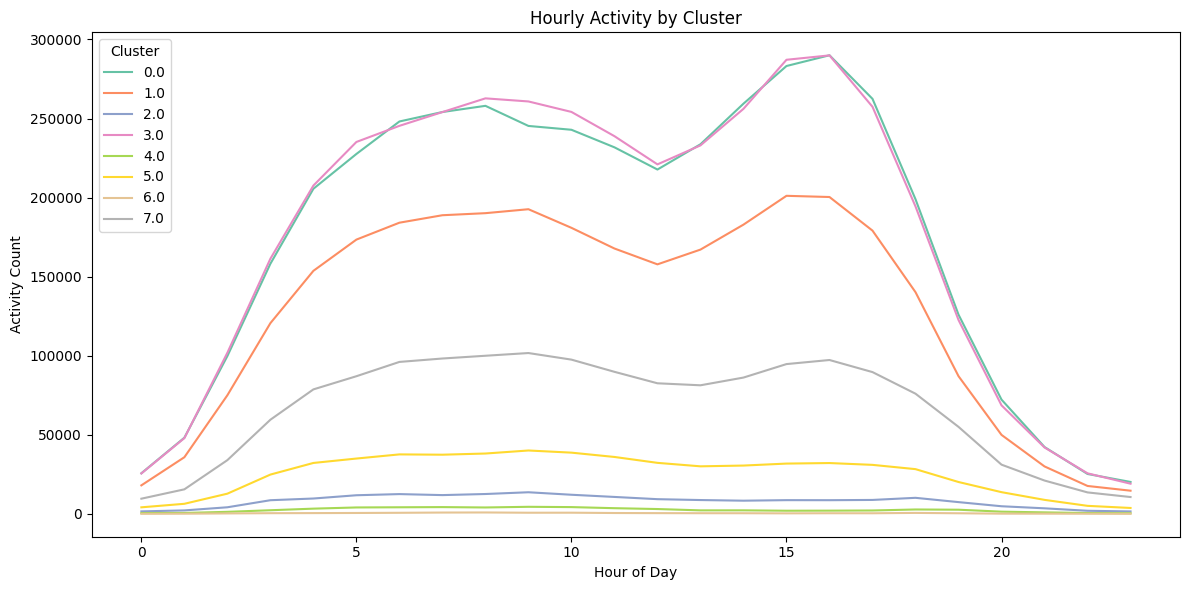

In [45]:
df['hour'] = pd.to_datetime(df['event_time']).dt.hour
hourly_activity= df.groupby(['Cluster', 'hour']).size().unstack(fill_value=0).T

hourly_activity.plot(kind='line', figsize=(12, 6), colormap='Set2')
plt.title('Hourly Activity by Cluster')
plt.xlabel('Hour of Day')
plt.ylabel('Activity Count')
plt.legend(title='Cluster', loc='upper left')
plt.tight_layout()
plt.show()

In [46]:
# product
cluster_popular_products = df[df['event_type'] == 'purchase'].groupby(['Cluster', 'product_id']).size().unstack(fill_value=0)
cluster_popular_products_top = cluster_popular_products.apply(lambda x: x.sort_values(ascending=False).head(10), axis=1)
display(cluster_popular_products_top)
# brand
cluster_popular_brands = df[df['event_type'] == 'purchase'].groupby(['Cluster', 'brand']).size().unstack(fill_value=0)
cluster_popular_brands_top = cluster_popular_brands.apply(lambda x: x.sort_values(ascending=False).head(10), axis=1)
display(cluster_popular_brands_top)

product_id,1002524,1002544,1004237,1004246,1004249,1004741,1004767,1004833,1004836,1004856,...,1005117,1005130,1005135,1005140,1005144,1201397,1801555,4804056,5100563,5100816
Cluster,,,,,,,,,,,,,,,,,,,,,
0.0,NaN,2129.0,NaN,NaN,NaN,NaN,5005.0,2812.0,1826.0,7116.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3058.0,NaN,2093.0
1.0,NaN,1531.0,NaN,NaN,NaN,1199.0,3678.0,2076.0,1277.0,5260.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2132.0,NaN,1634.0
2.0,429.0,589.0,NaN,NaN,927.0,NaN,1194.0,753.0,NaN,1060.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,565.0,NaN,NaN
3.0,NaN,1873.0,NaN,NaN,1441.0,NaN,4886.0,2713.0,1744.0,6925.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2771.0,NaN,2081.0
4.0,191.0,345.0,NaN,151.0,361.0,NaN,305.0,341.0,NaN,439.0,...,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,1088.0,1591.0,NaN,NaN,1476.0,NaN,2434.0,1439.0,NaN,2861.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1267.0,NaN,NaN
6.0,NaN,NaN,63.0,NaN,NaN,NaN,102.0,NaN,NaN,NaN,...,77.0,63.0,NaN,106.0,70.0,87.0,148.0,NaN,248.0,NaN
7.0,1655.0,2489.0,NaN,NaN,2399.0,NaN,4202.0,2514.0,NaN,5244.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2553.0,NaN,NaN


brand,acer,apple,artel,canon,cordiant,dauscher,elenberg,hp,huawei,huggies,lenovo,lg,lucente,manfrotto,oppo,samsung,sony,triangle,xiaomi
Cluster,,,,,,,,,,,,,,,,,,,
0.0,NaN,24161.0,1687.0,NaN,3297.0,NaN,1795.0,NaN,5849.0,NaN,NaN,2065.0,2472.0,NaN,3034.0,40682.0,NaN,NaN,14899.0
1.0,NaN,20489.0,1283.0,NaN,2083.0,NaN,NaN,NaN,4920.0,NaN,NaN,1500.0,1646.0,NaN,1876.0,30480.0,NaN,1610.0,11651.0
2.0,479.0,10832.0,NaN,NaN,NaN,NaN,NaN,NaN,761.0,NaN,260.0,382.0,502.0,NaN,249.0,7659.0,352.0,NaN,2290.0
3.0,NaN,23366.0,NaN,NaN,3364.0,NaN,1812.0,NaN,5530.0,NaN,NaN,2072.0,2299.0,NaN,2450.0,38815.0,NaN,1800.0,13901.0
4.0,167.0,5377.0,NaN,229.0,NaN,NaN,NaN,NaN,154.0,NaN,NaN,55.0,191.0,NaN,85.0,3153.0,103.0,NaN,458.0
5.0,960.0,22085.0,NaN,NaN,NaN,NaN,NaN,NaN,2112.0,NaN,475.0,972.0,1693.0,NaN,1099.0,18286.0,843.0,NaN,4587.0
6.0,18.0,1202.0,56.0,NaN,NaN,3.0,NaN,7.0,3.0,4.0,NaN,156.0,NaN,4.0,NaN,735.0,NaN,NaN,NaN
7.0,1400.0,35361.0,NaN,NaN,1300.0,NaN,NaN,NaN,4172.0,NaN,NaN,1525.0,2775.0,NaN,2098.0,33086.0,1446.0,NaN,8828.0


In [47]:
high_spending_clusters = [2, 4, 6]

high_spending_popular_products = cluster_popular_products_top.loc[high_spending_clusters]
high_spending_popular_brands = cluster_popular_brands_top.loc[high_spending_clusters]

display(high_spending_popular_products)
display(high_spending_popular_brands)


product_id,1002524,1002544,1004237,1004246,1004249,1004741,1004767,1004833,1004836,1004856,...,1005117,1005130,1005135,1005140,1005144,1201397,1801555,4804056,5100563,5100816
Cluster,,,,,,,,,,,,,,,,,,,,,
2.0,429.0,589.0,NaN,NaN,927.0,NaN,1194.0,753.0,NaN,1060.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,565.0,NaN,NaN
4.0,191.0,345.0,NaN,151.0,361.0,NaN,305.0,341.0,NaN,439.0,...,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,63.0,NaN,NaN,NaN,102.0,NaN,NaN,NaN,...,77.0,63.0,NaN,106.0,70.0,87.0,148.0,NaN,248.0,NaN


brand,acer,apple,artel,canon,cordiant,dauscher,elenberg,hp,huawei,huggies,lenovo,lg,lucente,manfrotto,oppo,samsung,sony,triangle,xiaomi
Cluster,,,,,,,,,,,,,,,,,,,
2.0,479.0,10832.0,NaN,NaN,NaN,NaN,NaN,NaN,761.0,NaN,260.0,382.0,502.0,NaN,249.0,7659.0,352.0,NaN,2290.0
4.0,167.0,5377.0,NaN,229.0,NaN,NaN,NaN,NaN,154.0,NaN,NaN,55.0,191.0,NaN,85.0,3153.0,103.0,NaN,458.0
6.0,18.0,1202.0,56.0,NaN,NaN,3.0,NaN,7.0,3.0,4.0,NaN,156.0,NaN,4.0,NaN,735.0,NaN,NaN,NaN


In [48]:
high_spending_clusters = [2, 4, 6]

high_spending_popular_products = cluster_popular_products_top.loc[high_spending_clusters]
high_spending_popular_brands = cluster_popular_brands_top.loc[high_spending_clusters]

display(high_spending_popular_products)
display(high_spending_popular_brands)

product_id,1002524,1002544,1004237,1004246,1004249,1004741,1004767,1004833,1004836,1004856,...,1005117,1005130,1005135,1005140,1005144,1201397,1801555,4804056,5100563,5100816
Cluster,,,,,,,,,,,,,,,,,,,,,
2.0,429.0,589.0,NaN,NaN,927.0,NaN,1194.0,753.0,NaN,1060.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,565.0,NaN,NaN
4.0,191.0,345.0,NaN,151.0,361.0,NaN,305.0,341.0,NaN,439.0,...,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,63.0,NaN,NaN,NaN,102.0,NaN,NaN,NaN,...,77.0,63.0,NaN,106.0,70.0,87.0,148.0,NaN,248.0,NaN


brand,acer,apple,artel,canon,cordiant,dauscher,elenberg,hp,huawei,huggies,lenovo,lg,lucente,manfrotto,oppo,samsung,sony,triangle,xiaomi
Cluster,,,,,,,,,,,,,,,,,,,
2.0,479.0,10832.0,NaN,NaN,NaN,NaN,NaN,NaN,761.0,NaN,260.0,382.0,502.0,NaN,249.0,7659.0,352.0,NaN,2290.0
4.0,167.0,5377.0,NaN,229.0,NaN,NaN,NaN,NaN,154.0,NaN,NaN,55.0,191.0,NaN,85.0,3153.0,103.0,NaN,458.0
6.0,18.0,1202.0,56.0,NaN,NaN,3.0,NaN,7.0,3.0,4.0,NaN,156.0,NaN,4.0,NaN,735.0,NaN,NaN,NaN


In [49]:
average_spending_clusters = [0, 3, 5, 7]

average_spending_popular_products = cluster_popular_products_top.loc[average_spending_clusters]
average_spending_popular_brands = cluster_popular_brands_top.loc[average_spending_clusters]

display(average_spending_popular_products)
display(average_spending_popular_brands)

product_id,1002524,1002544,1004237,1004246,1004249,1004741,1004767,1004833,1004836,1004856,...,1005117,1005130,1005135,1005140,1005144,1201397,1801555,4804056,5100563,5100816
Cluster,,,,,,,,,,,,,,,,,,,,,
0.0,NaN,2129.0,NaN,NaN,NaN,NaN,5005.0,2812.0,1826.0,7116.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3058.0,NaN,2093.0
3.0,NaN,1873.0,NaN,NaN,1441.0,NaN,4886.0,2713.0,1744.0,6925.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2771.0,NaN,2081.0
5.0,1088.0,1591.0,NaN,NaN,1476.0,NaN,2434.0,1439.0,NaN,2861.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1267.0,NaN,NaN
7.0,1655.0,2489.0,NaN,NaN,2399.0,NaN,4202.0,2514.0,NaN,5244.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2553.0,NaN,NaN


brand,acer,apple,artel,canon,cordiant,dauscher,elenberg,hp,huawei,huggies,lenovo,lg,lucente,manfrotto,oppo,samsung,sony,triangle,xiaomi
Cluster,,,,,,,,,,,,,,,,,,,
0.0,NaN,24161.0,1687.0,NaN,3297.0,NaN,1795.0,NaN,5849.0,NaN,NaN,2065.0,2472.0,NaN,3034.0,40682.0,NaN,NaN,14899.0
3.0,NaN,23366.0,NaN,NaN,3364.0,NaN,1812.0,NaN,5530.0,NaN,NaN,2072.0,2299.0,NaN,2450.0,38815.0,NaN,1800.0,13901.0
5.0,960.0,22085.0,NaN,NaN,NaN,NaN,NaN,NaN,2112.0,NaN,475.0,972.0,1693.0,NaN,1099.0,18286.0,843.0,NaN,4587.0
7.0,1400.0,35361.0,NaN,NaN,1300.0,NaN,NaN,NaN,4172.0,NaN,NaN,1525.0,2775.0,NaN,2098.0,33086.0,1446.0,NaN,8828.0


In [50]:
inactive_clusters = [1]

inactive_popular_products = cluster_popular_products_top.loc[inactive_clusters]
inactive_popular_brands = cluster_popular_brands_top.loc[inactive_clusters]

display(inactive_popular_products)
display(inactive_popular_brands)

product_id,1002524,1002544,1004237,1004246,1004249,1004741,1004767,1004833,1004836,1004856,...,1005117,1005130,1005135,1005140,1005144,1201397,1801555,4804056,5100563,5100816
Cluster,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,1531.0,NaN,NaN,NaN,1199.0,3678.0,2076.0,1277.0,5260.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2132.0,NaN,1634.0


brand,acer,apple,artel,canon,cordiant,dauscher,elenberg,hp,huawei,huggies,lenovo,lg,lucente,manfrotto,oppo,samsung,sony,triangle,xiaomi
Cluster,,,,,,,,,,,,,,,,,,,
1.0,NaN,20489.0,1283.0,NaN,2083.0,NaN,NaN,NaN,4920.0,NaN,NaN,1500.0,1646.0,NaN,1876.0,30480.0,NaN,1610.0,11651.0


In [53]:
df = df.sort_values(by=['user_id', 'event_time'])

In [54]:
df.head(10)

,event_time,event_type,product_id,category_code,brand,price,user_id,general_category,Cluster,hour
6474358,2019-10-06 05:02:51+00:00,view,8500086,unknown.,hubert,486.08,264649825,unknown,1.0,5
6474989,2019-10-06 05:03:26+00:00,view,8500086,unknown.,hubert,486.08,264649825,unknown,1.0,5
6475421,2019-10-06 05:03:51+00:00,view,8500081,unknown.,kiturami,481.35,264649825,unknown,1.0,5
6475812,2019-10-06 05:04:13+00:00,view,8500083,unknown.,kiturami,552.14,264649825,unknown,1.0,5
7234816,2019-10-06 15:22:18+00:00,view,27700136,construction.tools.pump,NaN,33.28,264649825,construction,1.0,15
7239477,2019-10-06 15:25:28+00:00,view,8500083,unknown.,kiturami,552.14,264649825,unknown,1.0,15
7240165,2019-10-06 15:25:56+00:00,view,8500083,unknown.,kiturami,552.14,264649825,unknown,1.0,15
7240899,2019-10-06 15:26:26+00:00,view,8500083,unknown.,kiturami,552.14,264649825,unknown,1.0,15
7244625,2019-10-06 15:29:00+00:00,purchase,8500083,unknown.,kiturami,552.14,264649825,unknown,1.0,15
7288206,2019-10-06 15:58:19+00:00,view,8500083,unknown.,kiturami,552.14,264649825,unknown,1.0,15
